<a href="https://colab.research.google.com/github/Batuh1907/Batuh1907/blob/IE423/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()
import io
data = pd.read_csv(io.BytesIO(uploaded['final_data.csv']))
data.head()

Saving final_data.csv to final_data.csv


,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [ ]:
data = data.drop(columns=['player', 'team', 'name'])

In [ ]:
data = data.dropna()

In [ ]:
data = pd.get_dummies(data)

In [ ]:
X = data.drop(columns=['current_value'])
y = data['current_value']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [ ]:
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 980263.1489229816
Mean Squared Error: 7976264734380.004
Root Mean Squared Error: 2824228.1661331835


In [ ]:
feature_importances = pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

                                       importance
highest_value                        7.098371e-01
age                                  1.490001e-01
minutes played                       4.777271e-02
goals                                2.329735e-02
appearance                           1.669457e-02
assists                              8.030863e-03
yellow cards                         7.573209e-03
award                                7.392578e-03
games_injured                        6.963834e-03
days_injured                         6.671189e-03
height                               5.664019e-03
red cards                            1.443901e-03
second yellow cards                  1.339890e-03
winger                               1.213375e-03
position_midfield-CentralMidfield    1.172109e-03
position_encoded                     1.127571e-03
position_Attack Centre-Forward       7.296903e-04
position_Attack-LeftWinger           6.505705e-04
position_midfield-AttackingMidfield  5.263600e-04


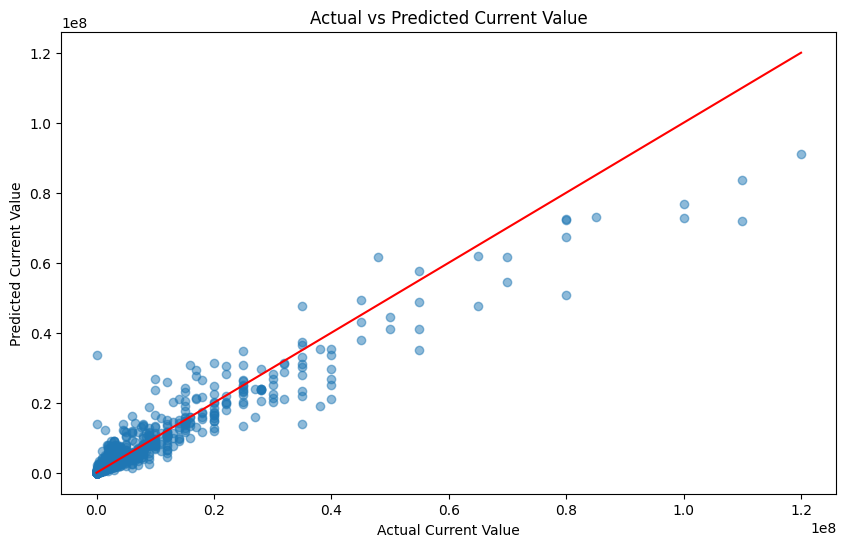

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # y=x line
plt.xlabel('Actual Current Value')
plt.ylabel('Predicted Current Value')
plt.title('Actual vs Predicted Current Value')
plt.show()